# Лабораторна робота 1

З генеральної сукупності взято вибірку:

In [1]:
import numpy as np

l = """
0 2 0 1 0 0 0 0 0 0 0 0 2 0 0 1 0 0 0 0
1 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0
0 0 0 0 0 0 0 1 0 0 1 0 2 0 0 0 1 1 1 1
0 0 0 1 2 0 0 0 0 0 0 0 0 0 1 0 2 1 0 1 
0"""
a = [int(s) for s in l.split()]
an = np.array(a)
an

array([0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 2, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 2, 1, 0, 1, 0])

Сумма генеральної сукупності

In [2]:
an.sum()

29

In [3]:
sum(a)

29

1) Запишемо варіаційний ряд

абсолютні частоти

In [4]:
import collections
counter = collections.Counter(an)
l_keys = list(counter.keys())
l_values = list(counter.values()) 
print(l_keys)
print(l_values)

[0, 1, 2]
[57, 19, 5]


In [5]:
hist, bin_edges = np.histogram(an)
print(np.unique(an))
print(hist)

[0 1 2]
[57  0  0  0  0 19  0  0  0  5]


In [6]:
ls = []
print(list(set(an)))
for j in list(set(an)):
    ls.append(np.count_nonzero(an == j))
print(ls)

[0, 1, 2]
[57, 19, 5]


In [7]:
from itertools import groupby
freq = {key:len(list(group)) for key, group in groupby(np.sort(an))}
print(freq)
print(list(freq.keys()))
print(list(freq.values()))

{0: 57, 1: 19, 2: 5}
[0, 1, 2]
[57, 19, 5]


2) Обчислимо моду

In [8]:
from statistics import mode
mode(an)

0

In [9]:
repeticiones = 0
for i in a:
    apariciones = a.count(i)
    if apariciones > repeticiones:
        repeticiones = apariciones

modas = []
for i in a:
    apariciones = a.count(i)
    if apariciones == repeticiones and i not in modas:
        modas.append(i)

print(modas)

[0]


In [10]:
counts = np.bincount(an)
print(np.argmax(counts))

0


Медіана

In [11]:
from statistics import median
print(np.median(an))
print(median(an))

0.0
0


Варіаційний ряд відносних частот

In [12]:
print(l_keys)
print(l_values)
l_rel =[]
for i in l_values:
    l_rel.append(round(i / len(an), 3))
print(l_rel)

[0, 1, 2]
[57, 19, 5]
[0.704, 0.235, 0.062]


In [13]:
print(l_keys)
print(l_values)
l_rel =[]
for i in l_values:
    l_rel.append(i / len(a))
print(np.array(l_rel))

[0, 1, 2]
[57, 19, 5]
[ 0.7037037  0.2345679  0.0617284]


Гістограма та полігон абсолютних частот

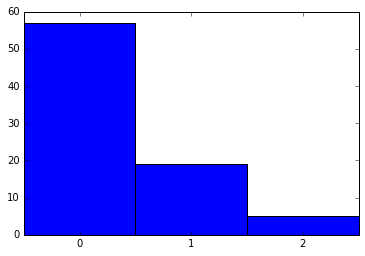

In [30]:
import matplotlib.pyplot as plt
width = 1
plt.bar(list(counter), l_values, width)
plt.xticks(np.arange(len(l_keys)) + width * 0.5, l_keys)
plt.show()

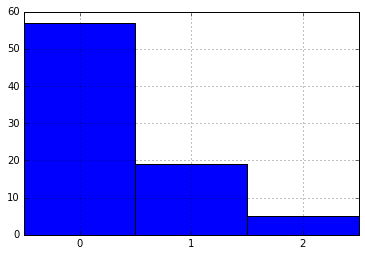

In [15]:
from collections import Counter
labels, values = zip(*Counter(a).items())
indexes = np.arange(len(labels))
width = 1
plt.grid(True)
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

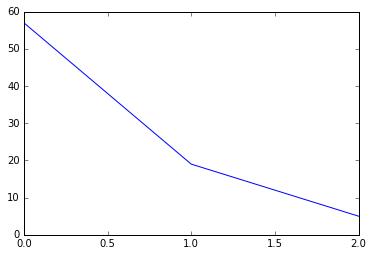

In [16]:
plt.plot(list(counter.keys()), values)
plt.show()

In [17]:
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
iplot([{"x": list(counter), "y": l_values}])

Гістограма та полігон відносних частот

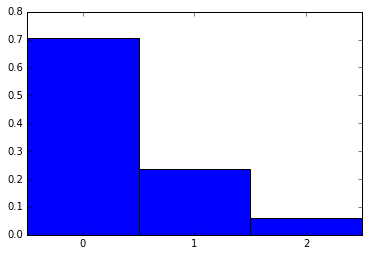

In [29]:
plt.bar(list(counter), l_rel, width)
plt.xticks(np.arange(len(l_keys)) + width * 0.5, l_keys)
plt.show()

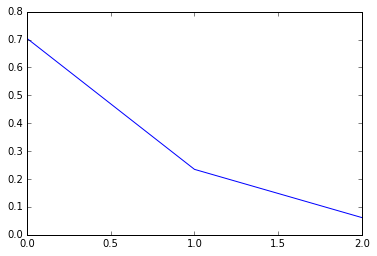

In [19]:
plt.plot(list(counter.keys()), l_rel)
plt.show()

In [20]:
init_notebook_mode(connected=True)
iplot([{"x": list(counter.keys()), "y": l_rel}])

4.1) Вибіркове середнє є незміщеною оцінкою генерального середнього і обчислюються за формулою.
Sample mean and covariance

In [21]:
from statistics import mean
print(mean(a))
print(np.mean(an))

0.35802469135802467
0.358024691358


4.2) Знайдемо незміщену оцінку генеральної дисперсії та середнього квадратичного відхилення:

sample variance

In [22]:
from statistics import variance
print(variance((a)))
print(np.cov(an))

0.357716049382716
0.35771604938271606


Знайдемо середнє відхилення.


mean absolute deviation MAD

In [23]:
n = float(len(an))
mean = sum(an) / n
diff = [abs(x - mean) for x in an]
sum(diff) / n

0.503886602652035

sqrt(Db)

In [24]:
from statistics import pvariance
from math import sqrt
print(sqrt(pvariance((a))))
print(sqrt(np.var(an)))

0.5943902773931221
0.5943902773931221


Знайдемо коефіцієнт варіації V 

Statistical dispersion

In [25]:
print((sqrt(np.var(an)) / np.mean(an)) )

1.66019353341


Накопичені частоти сортовані

In [26]:
ls = []
print(l_rel)
for i in range(len(l_rel)):
    ls.append(sum(l_rel[i:len(l_rel)]))
ls.reverse()

[0.7037037037037037, 0.2345679012345679, 0.06172839506172839]


Накопичені частоти

In [27]:
cumulative_frequencies = np.cumsum(l_rel).round(3)
cumulative_frequencies

array([ 0.704,  0.938,  1.   ])

Складемо другу статистичну таблицю

In [28]:
l_rel = np.array(l_rel).round(3)
import pandas as pd
x = pd.DataFrame({'Варіанта': range(len(l_keys)), 'Абсолютні частоти': list(counter.values()),
                  'Відносні частоти': l_rel, 
                  'Накопичені частоти': cumulative_frequencies})
x

,Абсолютні частоти,Варіанта,Відносні частоти,Накопичені частоти
0,57,0,0.704,0.704
1,19,1,0.235,0.938
2,5,2,0.062,1.000
